## Importing libraries

In [23]:
import numpy as np
import pylab as pl
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## Loading data

In [6]:
x1 = np.load("temper.npz")

In [8]:
x1.files

['villes', 'data', 'varname']

In [12]:
data_matrix = x1['data']
villes = x1['villes']
varname = x1['varname']

# Extraire la matrice des températures (les 12 premières colonnes)
temperature_matrix = data_matrix[:, :12]

print("Matrice des températures (15x14) :")
print(temperature_matrix)

print("\nListe des villes :")
print(villes)

print("\nNoms des variables/colonnes :")
print(varname)

Matrice des températures (15x14) :
[[ 5.6  6.6 10.3 12.8 15.8 19.3 20.9 21.  18.6 13.8  9.1  6.2]
 [ 6.1  5.8  7.8  9.2 11.6 14.4 15.6 16.  14.7 12.   9.   7. ]
 [ 2.6  3.7  7.5 10.3 13.8 17.3 19.4 19.1 16.2 11.2  6.6  3.6]
 [ 1.5  3.2  7.7 10.6 14.5 17.8 20.1 19.5 16.7 11.4  6.5  2.3]
 [ 2.4  2.9  6.   8.9 12.4 15.3 17.1 17.1 14.7 10.4  6.1  3.5]
 [ 2.1  3.3  7.7 10.9 14.9 18.5 20.7 20.1 16.9 11.4  6.7  3.1]
 [ 5.5  6.6 10.  13.  16.8 20.8 23.3 22.8 19.9 15.  10.2  6.9]
 [ 5.6  6.7  9.9 12.8 16.2 20.1 22.7 22.3 19.3 14.6 10.   6.5]
 [ 5.   5.3  8.4 10.8 13.9 17.2 18.8 18.6 16.4 12.2  8.2  5.5]
 [ 7.5  8.5 10.8 13.3 16.7 20.1 22.7 22.5 20.3 16.  11.5  8.2]
 [ 3.4  4.1  7.6 10.7 14.3 17.5 19.1 18.7 16.  11.4  7.1  4.3]
 [ 4.8  5.3  7.9 10.1 13.1 16.2 17.9 17.8 15.7 11.6  7.8  5.4]
 [ 0.4  1.5  5.6  9.8 14.  17.2 19.  18.3 15.1  9.5  4.9  1.3]
 [ 4.7  5.6  9.2 11.6 14.9 18.7 20.9 20.9 18.3 13.3  8.6  5.5]
 [ 2.4  3.4  7.1  9.9 13.6 17.1 19.3 18.8 16.  11.   6.6  3.4]]

Liste des villes :

## Affichage d'évolution de la température moyenne pour durant l'année

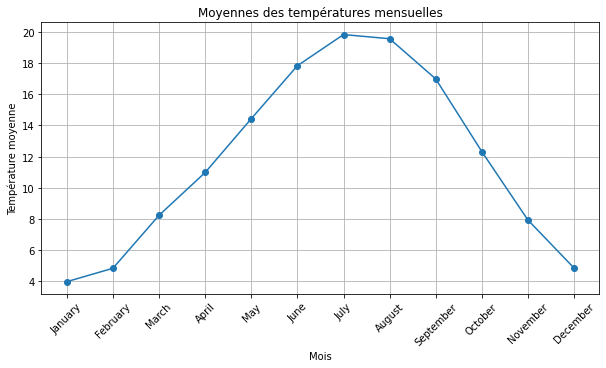

In [13]:
# Calculer les moyennes pour chaque mois
mean_temperatures = np.mean(temperature_matrix, axis=0)

# Visualiser les moyennes avec pl.plot
plt.figure(figsize=(10, 5))
plt.plot(mean_temperatures, marker='o')
plt.title('Moyennes des températures mensuelles')
plt.xlabel('Mois')
plt.ylabel('Température moyenne')
plt.xticks(ticks=np.arange(12), labels=x1['varname'][:12], rotation=45)
plt.grid(True)
plt.show()

## Affichage d'évolution de la température pour chaque ville durant l'année

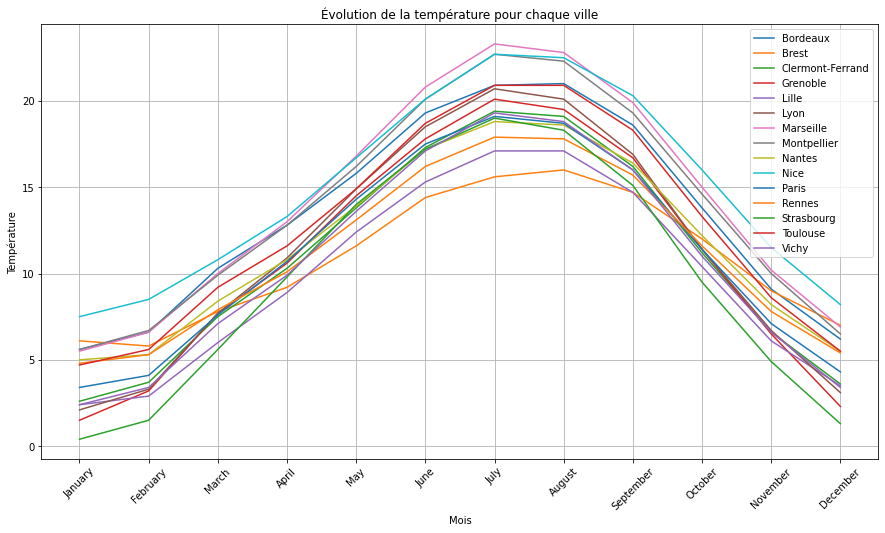

In [15]:
# Tracer les courbes de température pour chaque ville
plt.figure(figsize=(15, 8))
for i in range(temperature_matrix.shape[0]):
    plt.plot(temperature_matrix[i], label=villes[i])

plt.title("Évolution de la température pour chaque ville")
plt.xlabel("Mois")
plt.ylabel("Température")
plt.xticks(ticks=np.arange(12), labels=x1['varname'][:12], rotation=45)
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

## Afficher les positions des villes en fonction de la longitude et de la latitude

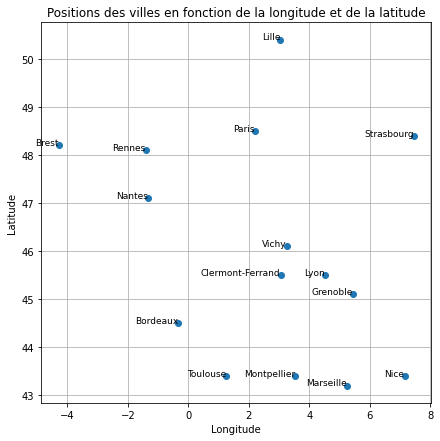

In [19]:
# Extraire les colonnes de latitude et de longitude
latitude = x1['data'][:, 12]
longitude = x1['data'][:, 13]

# Extraire la liste des villes
villes = x1['villes']

# Tracer les positions des villes
plt.figure(figsize=(7, 7))
plt.scatter(longitude, latitude, marker='o')

# Annoter chaque point avec le nom de la ville
for i, ville in enumerate(villes):
    plt.text(longitude[i], latitude[i], ville, fontsize=9, ha='right')

plt.title("Positions des villes en fonction de la longitude et de la latitude")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

## K-means clustering 

### Méthode de coude pour déterminer le nombre de clusters optimal

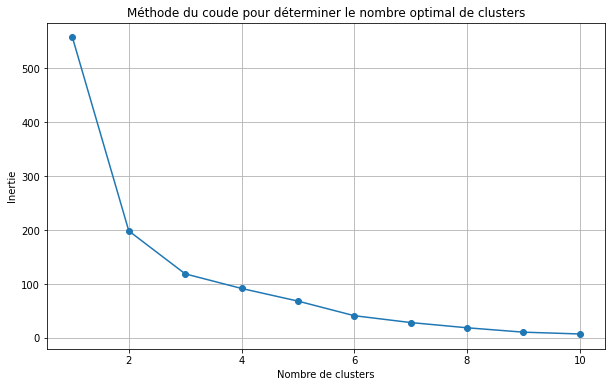

In [22]:
inertias = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(temperature_matrix)
    inertias.append(kmeans.inertia_)

# Tracer la courbe de l'inertie en fonction du nombre de clusters
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, marker='o')
plt.title("Méthode du coude pour déterminer le nombre optimal de clusters")
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertie")
plt.grid(True)
plt.show()

## Visualisation des clusters

### k_optimal = 2

In [44]:
# Choix du nombre de clusters
k_optimal = 2

# Appliquer l'algorithme KMeans
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
clusters = kmeans.fit_predict(temperature_matrix)

#### Affichage des clusters en fonction de la longitude et de la latitude

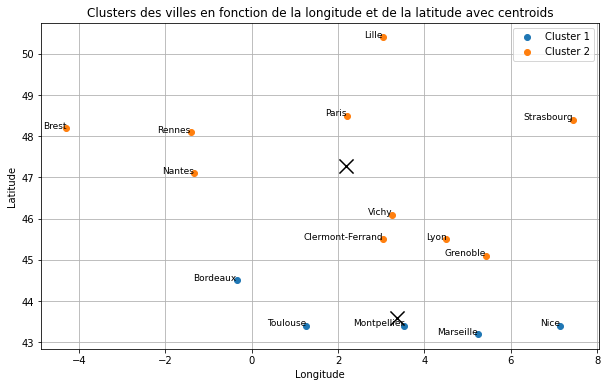

In [45]:
# Calculer les centroids en utilisant les latitudes et longitudes moyennes des clusters
centroids = np.zeros((k_optimal, 2))
for cluster in range(k_optimal):
    centroids[cluster, 0] = np.mean(longitude[clusters == cluster])
    centroids[cluster, 1] = np.mean(latitude[clusters == cluster])

# Visualiser les clusters en fonction de la longitude et de la latitude
plt.figure(figsize=(10, 6))
for cluster in range(k_optimal):
    plt.scatter(longitude[clusters == cluster], latitude[clusters == cluster], label=f'Cluster {cluster + 1}', cmap='tab10', vmax=9)
    plt.scatter(centroids[cluster, 0], centroids[cluster, 1], marker='x', s=200, c='black')  # Afficher les centroids

# Annoter chaque point avec le nom de la ville
villes = x1['villes']
for i, ville in enumerate(villes):
    plt.text(longitude[i], latitude[i], ville, fontsize=9, ha='right')

plt.title("Clusters des villes en fonction de la longitude et de la latitude avec centroids")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.grid(True)
plt.show()

Afficher la tem moy de chaque clusters !!!!

### k_optimal = 3

In [46]:
# Choix du nombre de clusters
k_optimal = 3

# Appliquer l'algorithme KMeans
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
clusters = kmeans.fit_predict(temperature_matrix)

#### Affichage des clusters en fonction de la longitude et de la latitude

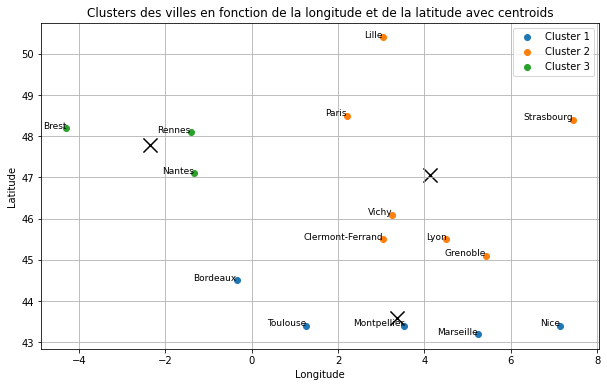

In [47]:
# Calculer les centroids en utilisant les latitudes et longitudes moyennes des clusters
centroids = np.zeros((k_optimal, 2))
for cluster in range(k_optimal):
    centroids[cluster, 0] = np.mean(longitude[clusters == cluster])
    centroids[cluster, 1] = np.mean(latitude[clusters == cluster])

# Visualiser les clusters en fonction de la longitude et de la latitude
plt.figure(figsize=(10, 6))
for cluster in range(k_optimal):
    plt.scatter(longitude[clusters == cluster], latitude[clusters == cluster], label=f'Cluster {cluster + 1}', cmap='tab10', vmax=9)
    plt.scatter(centroids[cluster, 0], centroids[cluster, 1], marker='x', s=200, c='black')  # Afficher les centroids

# Annoter chaque point avec le nom de la ville
villes = x1['villes']
for i, ville in enumerate(villes):
    plt.text(longitude[i], latitude[i], ville, fontsize=9, ha='right')

plt.title("Clusters des villes en fonction de la longitude et de la latitude avec centroids")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.grid(True)
plt.show()